
## 01MIAR - Actividad Video Valenbici

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas 3 y 4, así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código

### Entrega:
- Este mismo notebook con las respuetas

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Realización
- Convocatoria 1 - 19/05/2023 al 21/05/2023 hasta las 23:59 UTC+2

#### Descripción
El conjunto de datos "estaciones_bici.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web de la empresa municipal Valenbici, dedicada al alquiler de bicicletas en Valencia.

Los datos recabados de este servicio web son de mediciones cada 10 minutos de las estaciones:

https://valencia.opendatasoft.com/explore/dataset/valenbisi-disponibilitat-valenbisi-dsiponibilidad/information/

Cada estación está compuesta por un número variable de bornetas (total) donde se pueden anclar las bicicletas. Los datos obtenidos de cada estación (registros) refleja el número de bornetas libres (free) y el número de bicicletas disponibles (available).

#### Columnas para trabajar:
- number: id de la estación
- total: número total de bornetas
- updated (updated_at en origen): timestamp del estado en de bicis en la estación
- available: número de bicis disponibles

In [1]:
# Your impots here!!!
import os
import numpy as np
import pandas as pd
import sqlite3
from urllib import request
import matplotlib.pyplot as plt

## 01 Carga de datos de csv (estaciones_bici.csv) en un DataFrame y exploración de datos
> Nota: los datos y la libreta de jupyter tienen que estar en la misma carpeta


In [30]:
con = sqlite3.connect('valenbisi.db')

cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
name_table = cursor.fetchall()[0][0]
print(name_table)

df = pd.read_sql_query(f"SELECT * FROM {name_table}", con)
con.close()

download


In [31]:
# Your answer here!!!
df.head() # esto es el df obtenido mediante el código proporcionado por el notebook


,updated,address,number,available,lat,lon,total,open,free
0,2023-05-04 16:20:06,Peris y Valero - Cuba,39,5,39.457854,-0.373931,19,T,14
1,2023-05-04 16:20:06,Pintor Luis Arcas - Inst. Obrero Valenciano,46,4,39.455509,-0.358787,20,T,16
2,2023-05-04 16:20:06,Alfonso el Magnánimo - Nave,13,15,39.472062,-0.370874,24,T,9
3,2023-05-04 16:20:06,Angel Guimerá - Juan Llorens,22,4,39.469787,-0.388353,15,T,11
4,2023-05-04 16:20:06,Fernando el Católico - Cuenca,24,7,39.469077,-0.384027,20,T,11


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222180 entries, 0 to 222179
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   updated    222180 non-null  object 
 1   address    222180 non-null  object 
 2   number     222180 non-null  int64  
 3   available  222180 non-null  int64  
 4   lat        222180 non-null  float64
 5   lon        222180 non-null  float64
 6   total      222180 non-null  int64  
 7   open       222180 non-null  object 
 8   free       222180 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 15.3+ MB


In [33]:
df_valebici = pd.read_csv('valenbici.csv', sep= ';') # este dataset es descargado en la página antes proporcionada, en la pestaña exportar ---> csv ---> todo el conjunto de datos
df_valebici.head() 

,gid,name,number_,address,open,available,free,total,ticket,updated_at,globalid,created_user,created_date,last_edited_user,last_edited_date,geo_shape,geo_point_2d
0,901618,38_AVDA. PERIS Y VALERO,38,Peris y Valero - Cabo Jubi,T,3,17,20,F,19/05/2023 11:30:13,{76A36858-7C93-4958-8A8B-22280B953817},NaN,NaN,NaN,NaN,"{""coordinates"": [-0.37024937736936264, 39.4594...","39.45940204927687, -0.37024937736936264"
1,901645,065_AVDA. DEL PUERTO III,65,Av. Puerto - Doctor Manuel Candela,T,0,19,19,T,19/05/2023 11:30:13,{77CDBBB8-91C3-4EA5-A8CE-4DC7580DC298},NaN,NaN,NaN,NaN,"{""coordinates"": [-0.3508373061951808, 39.46551...","39.465516292011046, -0.3508373061951808"
2,901647,067_JUAN VERDEGUER,67,Juan Verdeguer - Toneleros,T,8,6,14,F,19/05/2023 11:30:13,{BBC2961A-677F-47B3-8640-C009D7649F6B},NaN,NaN,NaN,NaN,"{""coordinates"": [-0.33679826304022287, 39.4588...","39.45886026320377, -0.33679826304022287"
3,901649,069_AVDA. DEL PUERTO,69,Av. Puerto - Serrería,T,5,20,25,F,19/05/2023 11:30:13,{C3BB42AB-6F87-4A30-8FC2-932F2D923480},NaN,NaN,NaN,NaN,"{""coordinates"": [-0.3387212679875118, 39.46195...","39.46195227384504, -0.3387212679875118"
4,901650,70_CALLE_COLON_ESQ_ALMIRANTE_ROGER_DE_LAURIA,70,"Colón, 44",T,11,6,17,F,19/05/2023 11:30:13,{2336F821-77E3-42D0-9215-FC7C69BE4025},NaN,NaN,NaN,NaN,"{""coordinates"": [-0.3716462894107889, 39.46921...","39.469213221319464, -0.3716462894107889"


In [34]:
df_valebici.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gid               276 non-null    int64  
 1   name              276 non-null    object 
 2   number_           276 non-null    int64  
 3   address           276 non-null    object 
 4   open              276 non-null    object 
 5   available         276 non-null    int64  
 6   free              276 non-null    int64  
 7   total             276 non-null    int64  
 8   ticket            276 non-null    object 
 9   updated_at        276 non-null    object 
 10  globalid          276 non-null    object 
 11  created_user      0 non-null      float64
 12  created_date      0 non-null      float64
 13  last_edited_user  0 non-null      float64
 14  last_edited_date  0 non-null      float64
 15  geo_shape         276 non-null    object 
 16  geo_point_2d      276 non-null    object 
dt

Este dataset esta mucho más sucio que el descargado por sqlite3, además de que solo tiene 276 filas, y el primero más de 20000. Por lo tanto, voy a continuar con el notebook descargado de la base de datos de sqlite3.

**Nota:** 
Entiendo que lo que pone en el markdown del notebook de descargar los datos CSV es una errata.

## 02 Obtención del número de estaciones que tienen un total de 30 bornetas ¿Qué estaciones son?

In [35]:
df.sample(5)

,updated,address,number,available,lat,lon,total,open,free
186715,2023-05-09 09:49:59,Giorgeta - Roig de Corella,195,4,39.459384,-0.384281,16,T,10
83222,2023-05-06 19:09:22,Albocácer - Vinaroz,123,11,39.487671,-0.364841,20,T,9
190147,2023-05-09 12:39:43,Pio IX - Músico Cabanilles,259,17,39.445460,-0.393015,20,T,0
150743,2023-05-08 12:09:04,Economista Gay - Luis Crumiere,137,5,39.489033,-0.379896,20,T,13
182402,2023-05-09 07:09:48,Nicasio Benlloch - Amics dels Corpus,205,4,39.489287,-0.393090,24,T,20


In [36]:
# Your answer here!!!
mask = df['total'] > 30

print(f'el numero total de estaciones con más de 30 bornetas son {len(df[mask])}')

el numero total de estaciones con más de 30 bornetas son 9660


In [40]:
#df.loc[mask, 'address'].unique()

print('las estaciones con mas de 30 bornas son estan en las siguiente calles: ')
# for n in df.loc[mask, 'address'].unique():
#     print(n)
display(df.loc[mask, 'address'].unique())
print('\n')
print('y tienen los siguientes números: ')
df.loc[mask, 'number'].unique()

las estaciones con mas de 30 bornas son estan en las siguiente calles: 


array(['Blasco Ibañez - Poeta Durán Tortajada', 'Naranjos (Magisterio)',
       'UPV Caminos', 'Manuel Broseta i Pont - Naranjos',
       'Estación AVE Joaquín Sorolla',
       'Autopista del Saler - Antonio Ferrandis (C.C. El Saler)',
       'Ribera - Plaza Ayuntamiento',
       'Hospital Nueva Fe (consultas externas)', 'C/Xàtiva 30-32',
       'Blasco Ibañez, 28 (F. Geografía e Historia)',
       'Blasco Ibañez, 32 (F. Filología)',
       'Blasco Ibañez - Doctor Gómez Ferrer (Clínico)'], dtype=object)



y tienen los siguientes números: 


array([ 93,  95, 113, 112, 194,  50,  15, 188, 148,  88,  90,  87],
      dtype=int64)

## 03 Número de estación con la media más alta de bicis disponibles

In [41]:
# Your answer here!!!
df_0 = df[['number', 'available']]
mean_of_available = df_0.groupby('number').mean().sort_values('available', ascending=False)
 #mean_of_available
print(mean_of_available.head(1))
print('\n')
print(f'La estación con el numero {mean_of_available.index[0]} es la que más bicicletas disponibles tiene con una media de {round(mean_of_available.iloc[0,0], 2)}')


        available
number           
101     22.859627


La estación con el numero 101 es la que más bicicletas disponibles tiene con una media de 22.86


## 04 Realizar el histograma de bicis disponibles de la estación del punto anterior

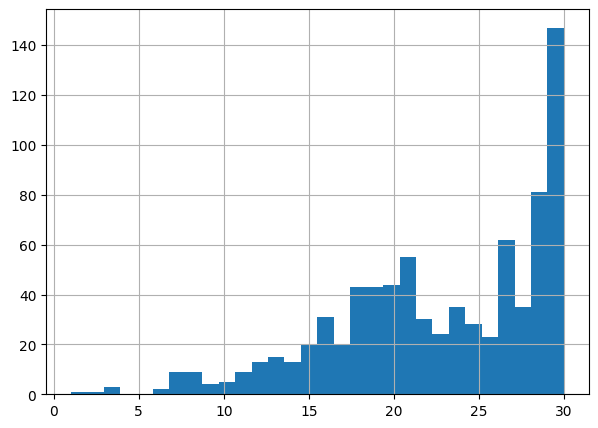

In [42]:
# Your answer here!!!
mask = df['number'] == 101

df.loc[mask, 'available'].hist(figsize=(7,5), bins= 30)
plt.show()

## 05 Realizar gráfica con  la línea temporal de bicis disponibles de la estación del punto anterior. Pista, es necesario cambiar el índice a uno tipo fecha

In [43]:
df.head()

,updated,address,number,available,lat,lon,total,open,free
0,2023-05-04 16:20:06,Peris y Valero - Cuba,39,5,39.457854,-0.373931,19,T,14
1,2023-05-04 16:20:06,Pintor Luis Arcas - Inst. Obrero Valenciano,46,4,39.455509,-0.358787,20,T,16
2,2023-05-04 16:20:06,Alfonso el Magnánimo - Nave,13,15,39.472062,-0.370874,24,T,9
3,2023-05-04 16:20:06,Angel Guimerá - Juan Llorens,22,4,39.469787,-0.388353,15,T,11
4,2023-05-04 16:20:06,Fernando el Católico - Cuenca,24,7,39.469077,-0.384027,20,T,11


In [44]:
# Your answer here!!!

df['updated'] = pd.to_datetime(df['updated'])

df['updated'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 222180 entries, 0 to 222179
Series name: updated
Non-Null Count   Dtype         
--------------   -----         
222180 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 MB


Ahora se puede observar como la columna ya no es object, si no, datetime64[ns]

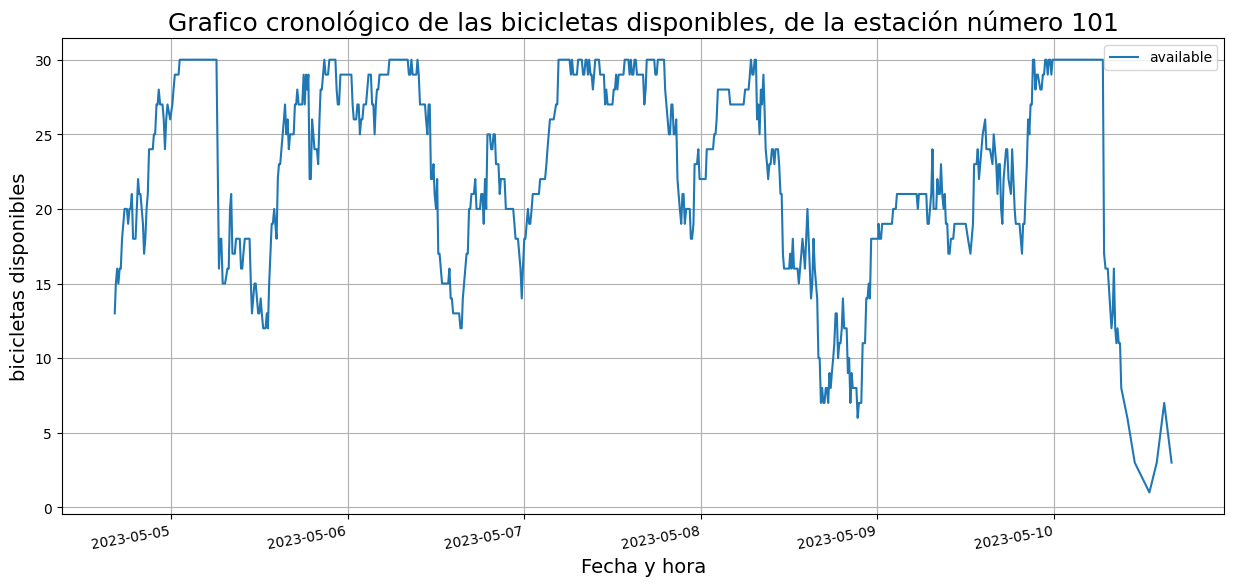

In [45]:
mask = df['number'] == 101

df[mask].plot(kind= 'line',
        x= 'updated',
        y = 'available',
        figsize=(15,7),
         grid= True,
         legend=True,
         rot=10,
         fontsize=10)

plt.title('Grafico cronológico de las bicicletas disponibles, de la estación número 101',fontdict={'fontsize':18})
plt.xlabel('Fecha y hora', fontdict={'fontsize':14})
plt.ylabel('bicicletas disponibles', fontdict={'fontsize':14})
plt.show()